In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.signal import convolve2d, correlate2d
from skimage.color import rgb2gray

In [2]:
im = imageio.imread("MaruTaro.jpg")
im = rgb2gray(im)

In [3]:
height, width = im.shape
P = height
Q = width
D0 = 60.0
U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
H_gauss = np.exp(-((U-P/2)**2 + (V-Q/2)**2)/(2*D0**2))

In [4]:
U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
H_low = (U-P/2)**2 + (V-Q/2)**2 <= D0**2

In [5]:
F = np.fft.fftshift(np.fft.fft2(im))

In [6]:
G_gauss = H_gauss * F
G_low = H_low * F

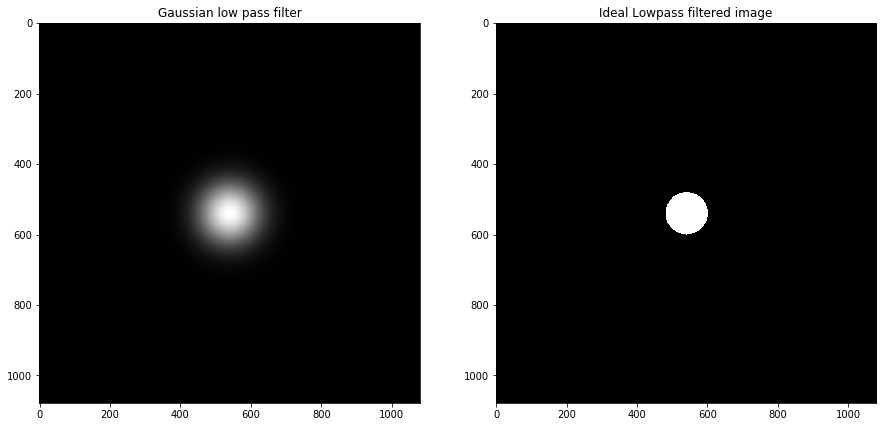

In [7]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(H_gauss,cmap="gray")
ax.set_title('Gaussian low pass filter')
ax2.imshow(H_low,cmap="gray")
ax2.set_title('Ideal Lowpass filtered image')

plt.show()

In [8]:
H_high_ideal = 1 - H_low
H_high_gauss = 1 - H_gauss

In [9]:
G_high_ideal = H_high_ideal * F
G_high_gauss = H_high_gauss * F

In [10]:
real_high_ideal = np.real(np.fft.ifft2(np.fft.ifftshift(G_high_ideal)))
real_high_gauss = np.real(np.fft.ifft2(np.fft.ifftshift(G_high_gauss)))



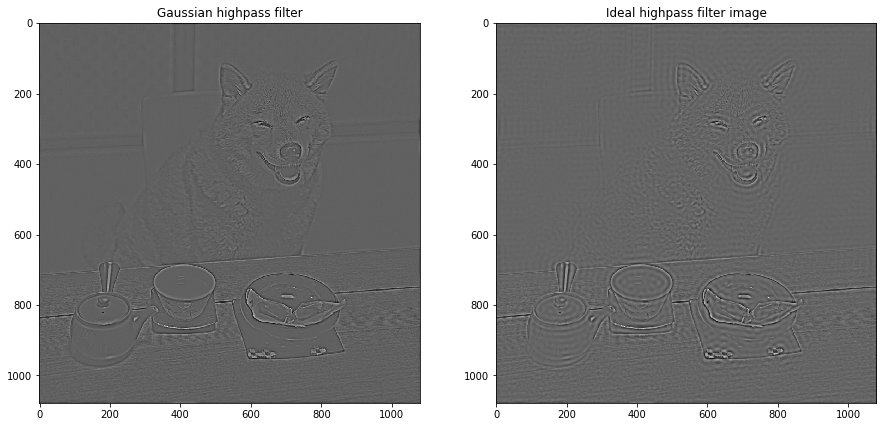

In [11]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(real_high_gauss,cmap="gray")
ax.set_title('Gaussian highpass filter')
ax2.imshow(real_high_ideal,cmap="gray")
ax2.set_title('Ideal highpass filter image')

plt.show()

In [12]:
for i in range(1000):
    height, width = im.shape
    P = height
    Q = width
    D0 = 60.0
    U, V = np.meshgrid(np.arange(P), np.arange(Q), indexing='ij')
    H_gauss = np.exp(-((U-P/2)**2 + (V-Q/2)**2)/(2*D0**2))
    real_gauss_low = np.real(np.fft.ifft2(np.fft.ifftshift(G_gauss)))
    im = real_gauss_low

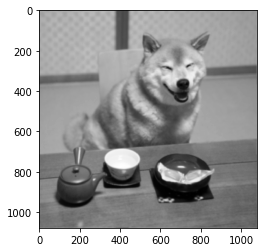

In [13]:
plt.imshow(real_gauss_low, cmap='gray')